# COGS 108 - EDA Checkpoint

# Names

- Alex Kuang
- Lucas Papaioannou
- Ryan Harsono
- Bailey Ho
- Michael Maytesyan

<a id='research_question'></a>
# Research Question

How do changes in US transportation spending affect average prices between various car brands per year?

# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cardf = pd.read_csv(r'.\used_cars_data.csv', low_memory = True)
budgets = pd.read_csv(r'.\budgets.csv')

C:\Users\omicr\AppData\Local\Temp\ipykernel_9376\3224425680.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cardf = pd.read_csv(r'.\used_cars_data.csv', low_memory = True)


# Data Cleaning

To begin, we first checked how much of each of the columns in our dataset had missing data, which is indicated by NaN or NA. We found that the column labeled "franchise_make", representing the different brands of vehicles, was missing data in approximately 19% of its rows, comprising a significant portion of the column data. Because one of our variables of interest in our research question is the brand of vehicles being sold, we dropped rows that have missing data in the "franchise_make" column.

In [2]:
# There are many columns currently in this dataset that we do not need. 
# To answer our research question and preform analysis we only need 
# 'price', 'franchise_make', 'body_type', 'is_new', 'year', and 'listed_date'
cardf.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [5]:
# Since we do not need all the columns of this df we just create another df that contains the columns we need.
needed_cols = ['price', 'franchise_make', 'body_type', 'is_new', 'year','listed_date']
smaller_cardf = cardf[needed_cols]

# checking how much of each column is NaN or NA
print(smaller_cardf.isna().mean())
# We can see that the "franchise_make" column has a sizeable percentage of missing data, around 19%. 
# Since we are interested in "franchise_make" for our research question we have to drop columns that have a missing franchise_make
smaller_cardf = smaller_cardf[smaller_cardf.notna()['franchise_make']]

price             0.000000
franchise_make    0.190876
body_type         0.004514
is_new            0.000000
year              0.000000
listed_date       0.000000
dtype: float64


In [6]:
# Here is our final dataframe, with only the relevant columns that we want to retain. 
# Unnecessary information has been cut out as we are only interested in the types of cars, 
# when they were listed, whether the model year newer than 2 years., the make, and the price.

smaller_cardf

,price,franchise_make,body_type,is_new,year,listed_date
0,23141.0,Jeep,SUV / Crossover,True,2019,2019-04-06
1,46500.0,Land Rover,SUV / Crossover,True,2020,2020-02-15
2,46995.0,FIAT,Sedan,False,2016,2017-04-25
3,67430.0,Land Rover,SUV / Crossover,True,2020,2020-02-26
4,48880.0,Land Rover,SUV / Crossover,True,2020,2020-04-25
...,...,...,...,...,...,...
3000032,22901.0,Nissan,Van,True,2020,2020-07-12
3000034,40993.0,Ford,Pickup Truck,False,2017,2020-06-15
3000036,36490.0,Chevrolet,SUV / Crossover,True,2020,2020-03-25
3000037,12990.0,Jeep,Sedan,False,2016,2020-06-13


In [7]:
# We need to clean up the budgets df as the total money spent is in a string format not a float
budgets = pd.read_csv(r'.\budgets.csv')
budgets['2018'] = budgets['2018'].apply(lambda x : float(x.replace(',','')))
budgets['2019'] = budgets['2019'].apply(lambda x : float(x.replace(',','')))
budgets['2020'] = budgets['2020'].apply(lambda x : float(x.replace(',','')))

# As seen below the types of the 2018, 2019, 2020 columns have been fixed
budgets

,State,2018,2019,2020
0,Alabama,6.407370e+07,6.217764e+07,7.802033e+07
1,Alaska,6.556634e+07,6.051608e+07,8.120109e+07
2,American Samoa,1.346626e+06,4.366966e+06,5.007090e+06
3,Arizona,1.579521e+08,2.320779e+08,3.149065e+08
4,Arkansas,3.837230e+07,3.664334e+07,3.726260e+07
5,California,2.798549e+09,2.070358e+09,2.112913e+09
6,Colorado,2.113750e+08,1.346584e+08,1.693795e+08
7,Connecticut,1.965856e+08,1.898076e+08,1.982542e+08
8,Delaware,3.155726e+07,3.158561e+07,3.205990e+07
9,District of Columbia,2.228053e+08,2.132218e+08,2.198998e+08


# Data Analysis & Results (EDA)

Explanations of EDA and graphs are below each section that contains a graph.

Text(0.5, 1.0, 'Figure 1: Number of Sales Per Brand vs. Number of Brands (2018-2020)')

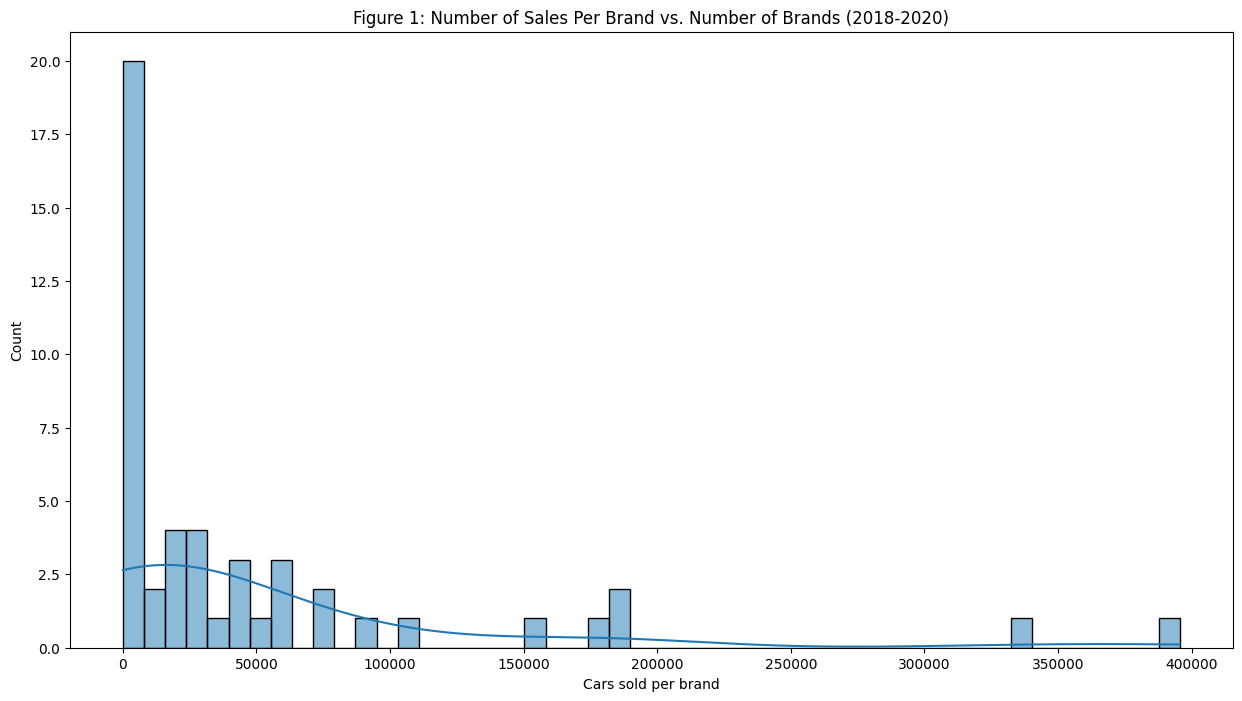

In [8]:
f1, ax = plt.subplots(figsize=(15,8))
sales_by_brand = smaller_cardf['franchise_make'].value_counts()
sns.histplot(x = sales_by_brand, kde = True, bins = 50)
plt.xlabel("Cars sold per brand")
plt.title("Figure 1: Number of Sales Per Brand vs. Number of Brands (2018-2020)")

We first used a countplot to portray the number of sales from each brand, from 2018-2020. We set the x-axis to the number of sales of each brand and made the y-axis the number of brands. After viewing the graph, it became clear that it was not easily comprehensible as it portrayed multiple brands in one bar, making it difficult to discern the approximate number of sales for each brand. For example, the first bar shows that there are 20 brands that have sales within the 0-10,000 range, but we were not also able to determine which brands sold a small number of cars. Since this was not specific enough for us to determine outliers brands, we plot the exact number of sales per brand.

Text(0.5, 1.0, 'Figure 2: Number of Sales Per Brand (2018-2020)')

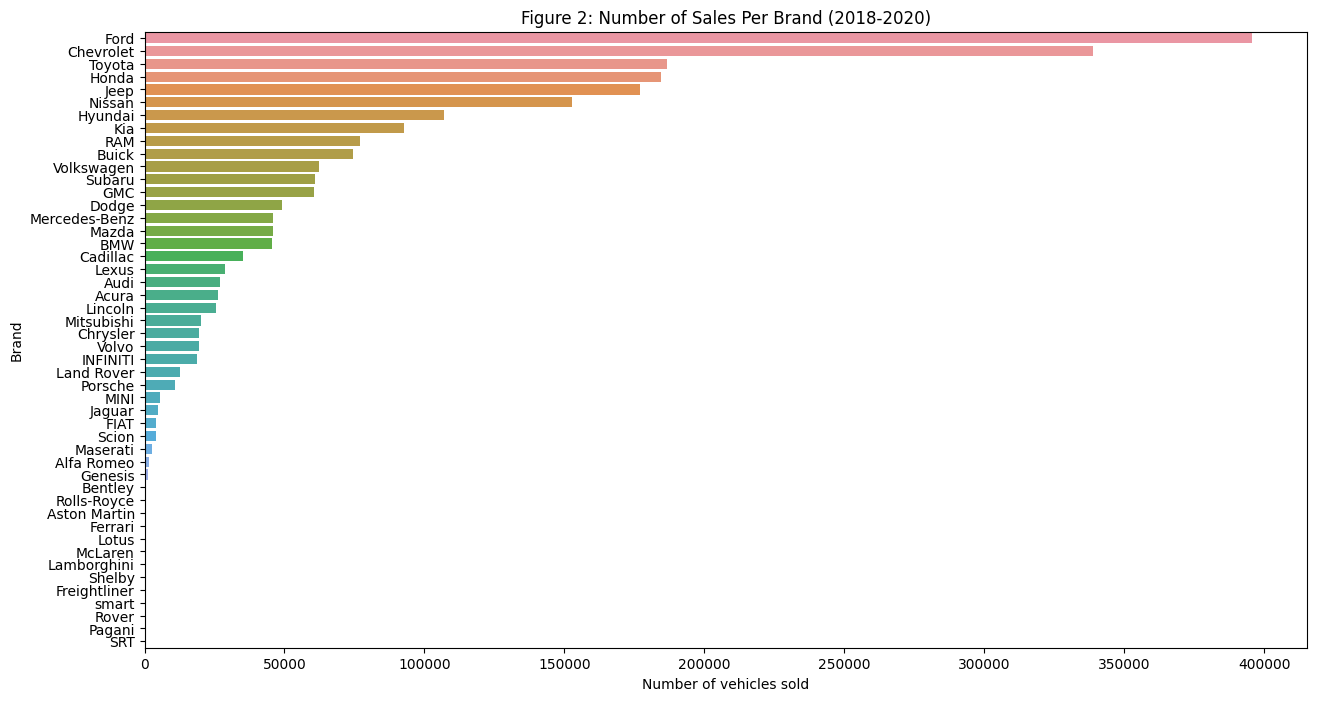

In [9]:
f2, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = sales_by_brand.index, x = sales_by_brand.values)
plt.ylabel('Brand')
plt.xlabel('Number of vehicles sold')
plt.title("Figure 2: Number of Sales Per Brand (2018-2020)")

As conveyed by the graph above, we made the x-axis the number of sales for each brand, with the y-axis detailing the specific brands, from 2018-2020. This allowed us to see each brand’s sales separately. All the brands below Genesis on the y-axis have sales below 1,000 cars over the course of these three years. We will be removing those 13 brands (Bentley, Rolls-Royce, Aston Martin, Ferrari, Lotus, McLaren, Lamborghini, Shelby, Freightliner, Smart, Rover, Pagani, SRT) from our dataset since they are outliers, having sold too few cars to be relevant to our research question. 

Text(0.5, 1.0, 'Figure 3: Median Car Price Per Brand (2018-2020)')

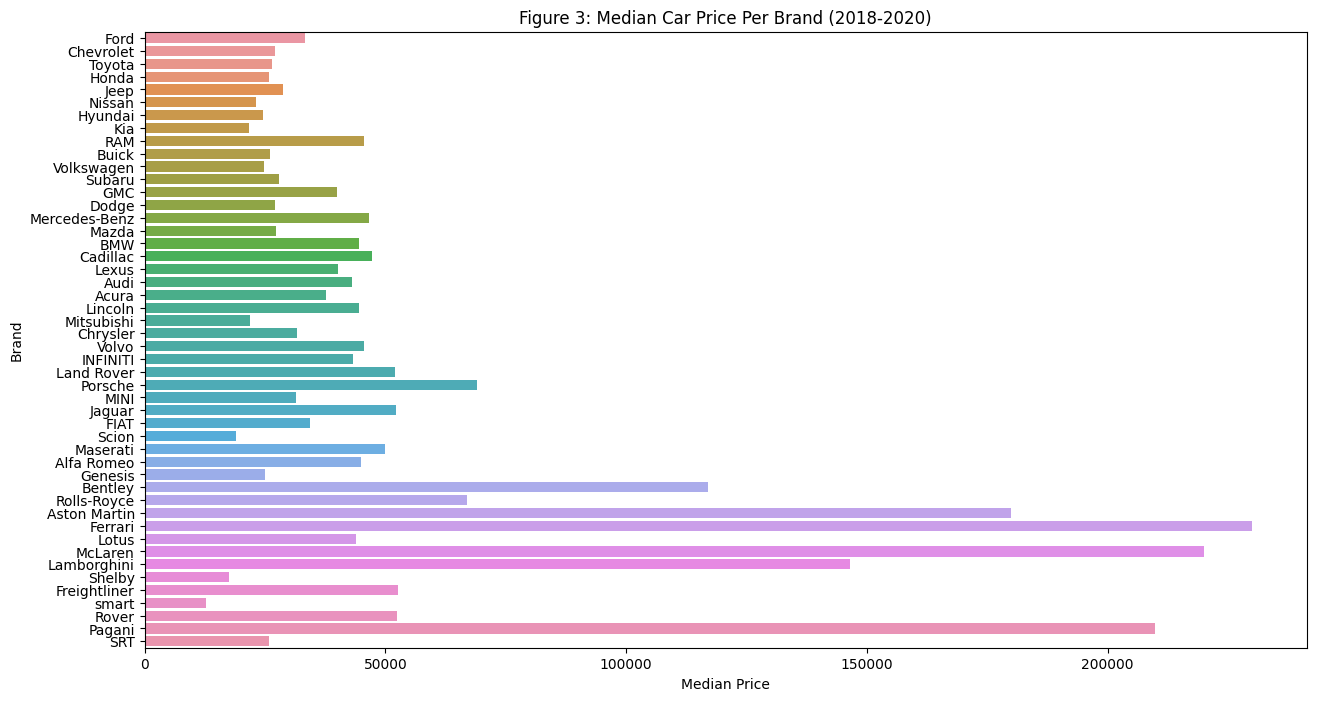

In [10]:
f3, ax = plt.subplots(figsize=(15,8))
median_price_brand = smaller_cardf.groupby('franchise_make')['price'].median().sort_values(ascending = False)
sns.barplot(y = median_price_brand.index, x = median_price_brand.values, order = sales_by_brand.index)
plt.xlabel('Median Price')
plt.ylabel('Brand')
plt.title("Figure 3: Median Car Price Per Brand (2018-2020)")

Additionally, we wanted to test if there was a relationship between the prices of the outliers and the number of sales in order to validate our decision to classify brands with a low number of sales as outliers and remove them from our data. To do this, we created the chart above, which shows the median prices of each brand. From our graph, we can see that the brands we chose to remove tended to have extreme median prices, being either extremely expensive or inexpensive, which supports our theory of the brands being outliers. We used the median to account for any outliers in the data, with the outliers being removed in the graphs below.

In [11]:
needed_brands = sales_by_brand[sales_by_brand > 1000].index.tolist()

filtered_cardf = smaller_cardf[smaller_cardf['franchise_make'].isin(needed_brands)]

Text(0.5, 1.0, 'Figure 4: Number of Sales Per Brand (2018-2020, Outliers Removed)')

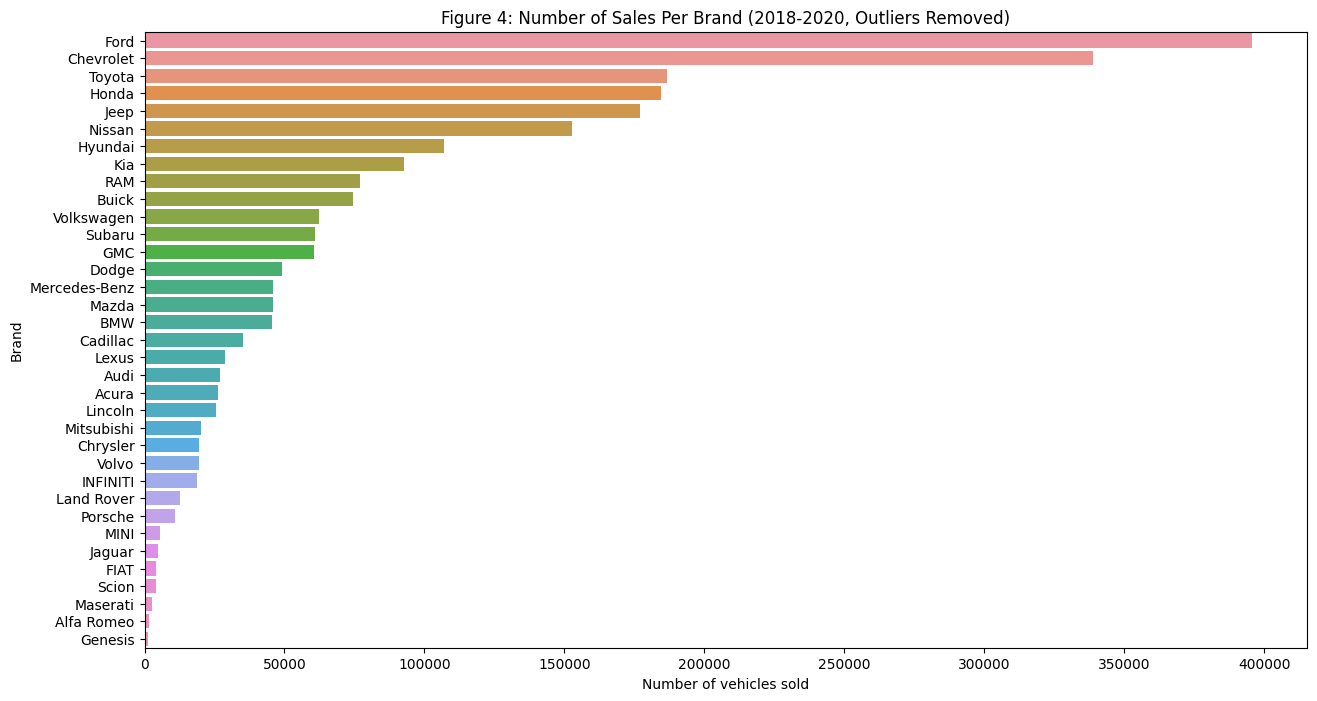

In [12]:
f4, ax = plt.subplots(figsize=(15,8))
filtered_sales_by_brand = filtered_cardf['franchise_make'].value_counts()
sns.barplot(y = filtered_sales_by_brand.index, x = filtered_sales_by_brand.values)
plt.ylabel('Brand')
plt.xlabel('Number of vehicles sold')
plt.title('Figure 4: Number of Sales Per Brand (2018-2020, Outliers Removed)')

The graph above is the resulting revision of Figure 2 after removing the 13 brands that we determined were outliers.

Text(0.5, 1.0, 'Figure 5: Median Car Price Per Brand (2018-2020, Outliers Removed)')

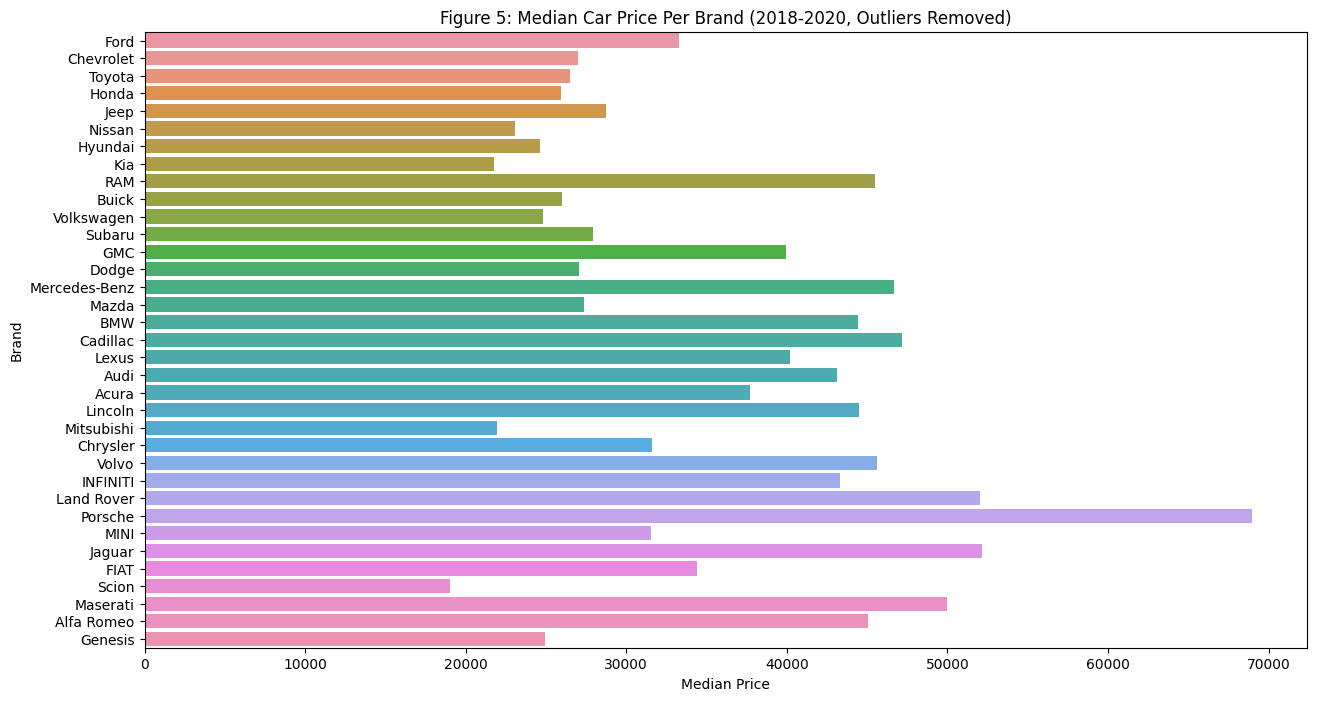

In [13]:
f5, ax = plt.subplots(figsize=(15,8))
filtered_median_price_brand = filtered_cardf.groupby('franchise_make')['price'].median().sort_values(ascending = False)
sns.barplot(y = filtered_median_price_brand.index, x = filtered_median_price_brand.values, order = filtered_sales_by_brand.index)
plt.xlabel('Median Price')
plt.ylabel('Brand')
plt.title('Figure 5: Median Car Price Per Brand (2018-2020, Outliers Removed)')

The graph above is the resulting revision of Figure 3 after removing the 13 brands that we determined were outliers.

In [14]:
# Make the "State" column the index of the budgets df so we can simplify it
budgets = budgets.set_index("State")
budgets

,2018,2019,2020
State,,,
Alabama,6.407370e+07,6.217764e+07,7.802033e+07
Alaska,6.556634e+07,6.051608e+07,8.120109e+07
American Samoa,1.346626e+06,4.366966e+06,5.007090e+06
Arizona,1.579521e+08,2.320779e+08,3.149065e+08
Arkansas,3.837230e+07,3.664334e+07,3.726260e+07
California,2.798549e+09,2.070358e+09,2.112913e+09
Colorado,2.113750e+08,1.346584e+08,1.693795e+08
Connecticut,1.965856e+08,1.898076e+08,1.982542e+08
Delaware,3.155726e+07,3.158561e+07,3.205990e+07


Text(0.5, 1.0, 'Figure 6: Federal U.S. Transportation Spending Per Year (2018-2020)')

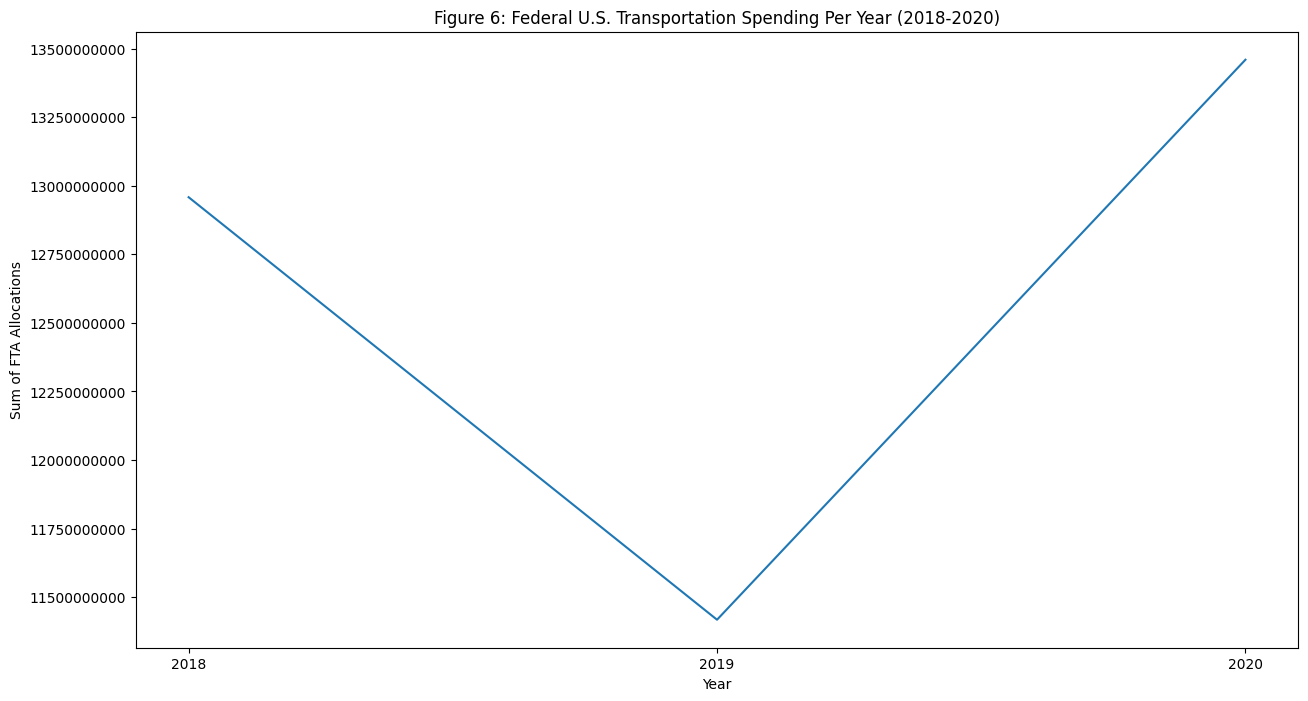

In [15]:
f6, ax = plt.subplots(figsize=(15,8))
total_budget_by_year = budgets.sum(axis=0)

sns.lineplot(total_budget_by_year)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Sum of FTA Allocations')
plt.title('Figure 6: Federal U.S. Transportation Spending Per Year (2018-2020)')

Next, we plotted the values of the transportation budget spending from 2018-2020 as a line graph, as shown above. We can see that spending plummeted from 2018 to 2019, but then picked back up and exceeded the original spending in 2020.

In [16]:
# Make a column 'listed_year' based on the 'listed_date' column
filtered_cardf['listed_year'] = filtered_cardf['listed_date'].apply(lambda x : int(x.split('-')[0]))

C:\Users\omicr\AppData\Local\Temp\ipykernel_9376\2049843467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cardf['listed_year'] = filtered_cardf['listed_date'].apply(lambda x : int(x.split('-')[0]))


Text(0.5, 1.0, 'Figure 7: Average Car Price Per Year (2018-2020)')

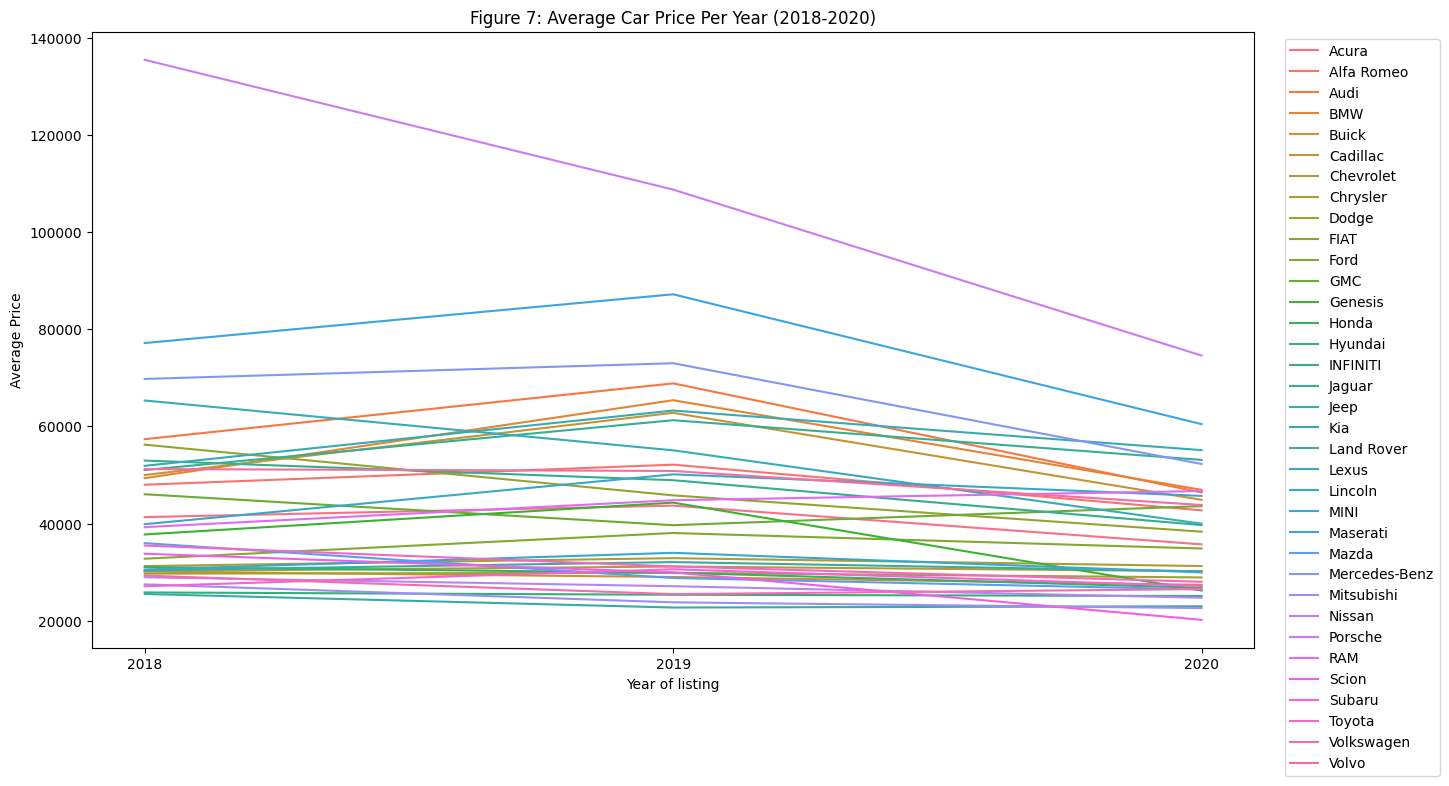

In [17]:
# need to filter based on 'listed_year' columns since there are lsitings from before 2018

f7, ax = plt.subplots(figsize=(15,8))

filtered_cardf = filtered_cardf[filtered_cardf['listed_year'] > 2017]

brand_sales_by_year = filtered_cardf.groupby(['franchise_make','listed_year'])['price'].mean().rename('average_price')

brand_sales_by_year = pd.DataFrame(brand_sales_by_year)

sns.lineplot(data = brand_sales_by_year, x = 'listed_year', y = 'average_price', hue = 'franchise_make')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xticks([2018, 2019, 2020])
plt.xlabel('Year of listing')
plt.ylabel('Average Price')
plt.title("Figure 7: Average Car Price Per Year (2018-2020)")

Next, we plotted the values of the average prices by brand from 2018-2020 as a line graph, as shown above. We can see that with all the data together like this it is hard to differentiate the change in price between brands.

In [18]:
percent_change_budgets = (budgets.sum(axis=0).pct_change()*100).drop('2018').rename('budget_change')
percent_change_budgets

2019   -11.886743
2020    17.879974
Name: budget_change, dtype: float64

In [19]:
change_brand_sales = brand_sales_by_year.unstack().pct_change(axis=1)*100
change_brand_sales.columns = change_brand_sales.columns.droplevel()
change_brand_sales = change_brand_sales.drop(2018, axis=1)
change_brand_sales = change_brand_sales.rename({2019:'2018-2019',2020:'2019-2020'}, axis= 'columns')

Text(0.5, 1.0, 'Figure 8: Percent Change in Average Car Price Per Brand (2018-2019)')

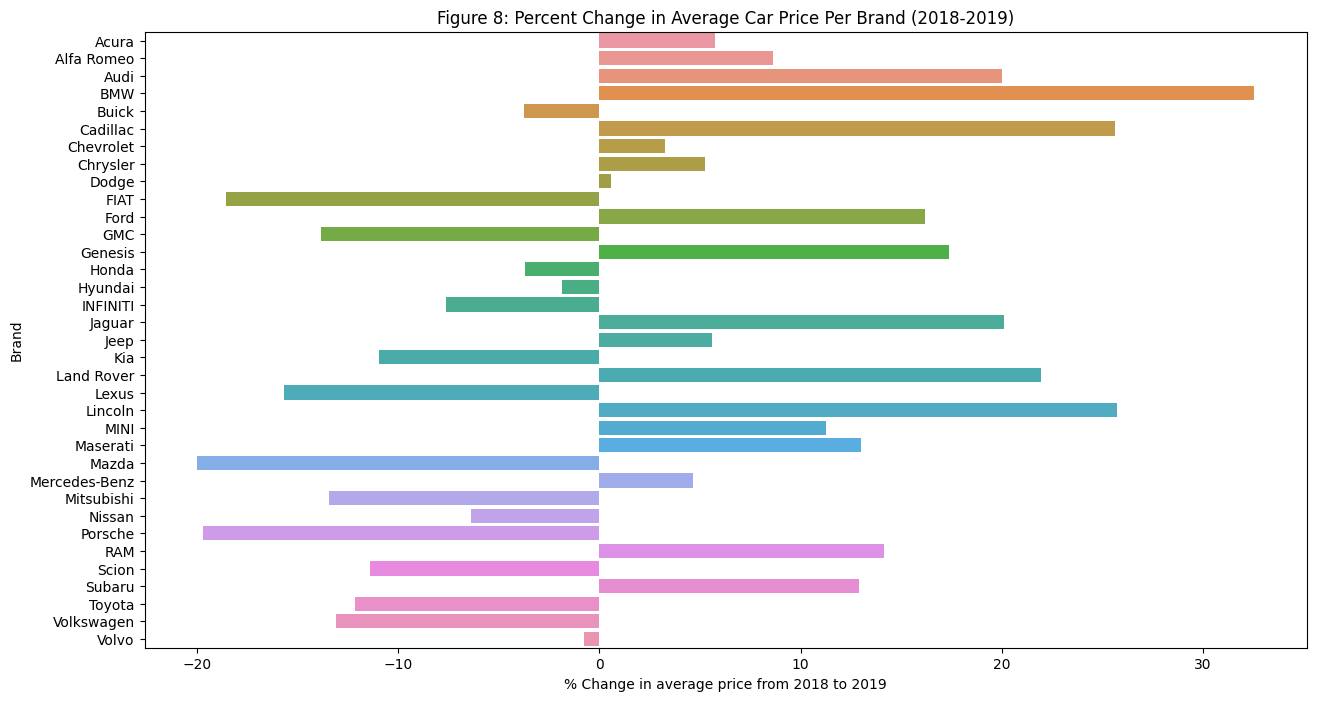

In [20]:
change_brand_sales
f8, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = change_brand_sales.index, x = change_brand_sales['2018-2019'])
plt.xlabel('% Change in average price from 2018 to 2019')
plt.ylabel('Brand')
plt.title('Figure 8: Percent Change in Average Car Price Per Brand (2018-2019)')

To better visualize the data in a way where we can answer our research question, we took all the average car prices from 2018-2020 and calculated their average percent change year over year. This way we can easily see the price change from 2018-2019 and 2019-2020 to better relate the information to the change in transportation spending. 

The chart above displays the percentage change in the average price of a car per car brand. At a glance, it appears that approximately half of the car brands examined saw an increase in the average price of their cars, while approximately half saw a decrease in their average price. BMW had the largest percentage increase in price while Mazda had the largest percentage decrease.

Text(0.5, 1.0, 'Figure 9: Percent Change in Average Car Price Per Brand (2019-2020)')

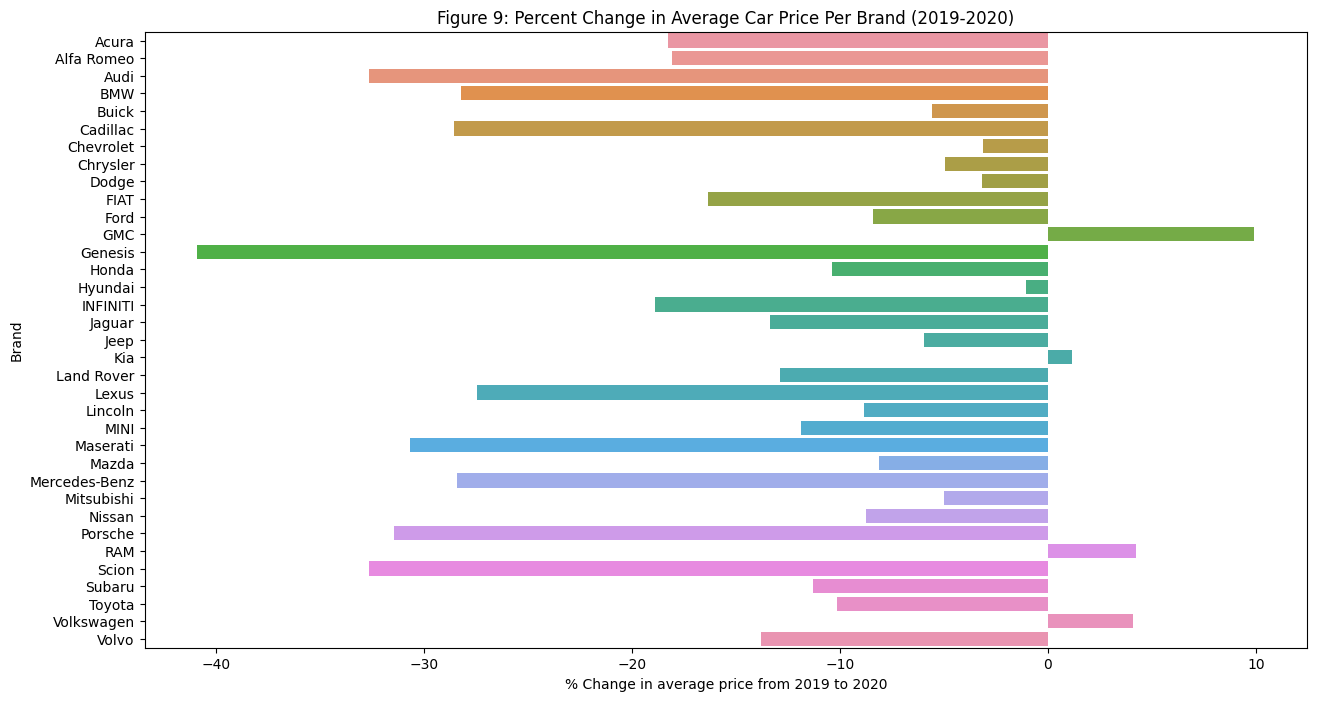

In [21]:
change_brand_sales
f9, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = change_brand_sales.index, x = change_brand_sales['2019-2020'])
plt.xlabel('% Change in average price from 2019 to 2020')
plt.ylabel('Brand')
plt.title('Figure 9: Percent Change in Average Car Price Per Brand (2019-2020)')

This chart shows the percent change in average prices in 2019-2020. As we can see, many car brands had their average prices drop (Genesis had the largest percentage decrease with about a 40% decrease), while a few went up (GMC had the largest percentage increase with a 10% increase). A possible explanation for this trend is due to the COVID-19 pandemic.